In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [14]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("dataset02.csv")

In [4]:
data.describe()

/usr/lib/python3/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,y
count,2.060000e+02
mean,4.854369e+156
std,inf
min,-5.744308e+00
25%,1.219424e+01
50%,2.848690e+01
75%,4.031530e+01
max,1.000000e+159


In [146]:
data.head()

,x,y
0,46.56922442211345,43.901322
1,46.799749882612765,47.682727
2,49.70505782865616,46.772946
3,35.73995379842663,32.640444
4,11.392664643376904,5.662792


In [147]:
data.shape

(207, 2)

In [5]:
data_numeric = data.apply(pd.to_numeric, errors='coerce') 

In [149]:
data_numeric.shape

(207, 2)

In [150]:
data_numeric.isnull().sum()

x    2
y    1
dtype: int64

In [6]:
clean_data = data_numeric.dropna()

In [152]:
clean_data.shape

(204, 2)

In [7]:
z_scores = np.abs(zscore(clean_data))
print('\nZ-Scores: ')
z_scores


Z-Scores: 


/usr/lib/python3/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


,x,y
0,1.402604,0.0
1,1.418234,0.0
2,1.615215,0.0
3,0.668374,0.0
4,0.982386,0.0
...,...,...
199,0.505227,0.0
203,0.505227,0.0
204,0.505227,0.0
205,1.415812,0.0


In [8]:
threshold = 2  # Typical threshold for Z-scores
data_no_outliers = clean_data[(z_scores < threshold).all(axis=1)]
data_no_outliers

,x,y
0,46.569224,4.390132e+01
1,46.799750,4.768273e+01
2,49.705058,4.677295e+01
3,35.739954,3.264044e+01
4,11.392665,5.662792e+00
...,...,...
199,33.333685,3.872631e+01
203,33.333685,9.900000e+01
204,33.333685,1.000000e+159
205,5.000000,5.000000e+01


/usr/lib/python3/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


ValueError: array must not contain infs or NaNs

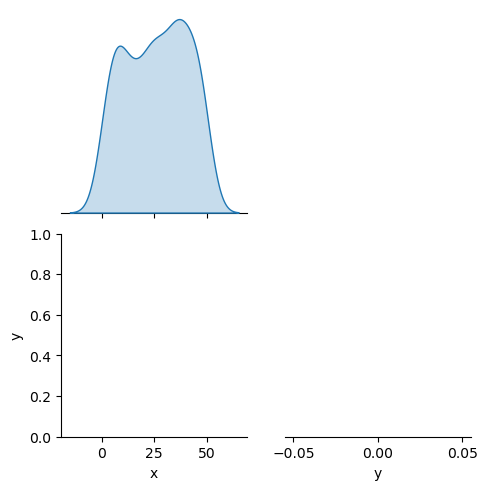

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data_no_outliers, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Data Without Outliers", y=1.02)
plt.show()

In [9]:
Q1 = data_no_outliers.quantile(0.25)
Q3 = data_no_outliers.quantile(0.75)
IQR = Q3 - Q1
final_data = data_no_outliers[~((data_no_outliers < (Q1 - 1.5 * IQR)) | (data_no_outliers > (Q3 + 1.5 * IQR))).any(axis=1)]

In [156]:
final_data

,x,y
0,46.569224,43.901322
1,46.799750,47.682727
2,49.705058,46.772946
3,35.739954,32.640444
4,11.392665,5.662792
...,...,...
197,45.594352,49.994189
198,7.070954,8.206501
199,33.333685,38.726312
205,5.000000,50.000000


In [10]:
#Normalisation

final_data = (final_data - final_data.min()) / (final_data.max() - final_data.min())

In [12]:
training_data = final_data.sample(frac=0.8, random_state=42)
training_data.to_csv('/exampleRepository/exampleRepository/dataset02_training.csv', index=False)

testing_data = final_data.drop(training_data.index)
testing_data.to_csv('/exampleRepository/exampleRepository/dataset02_testing.csv', index=False)

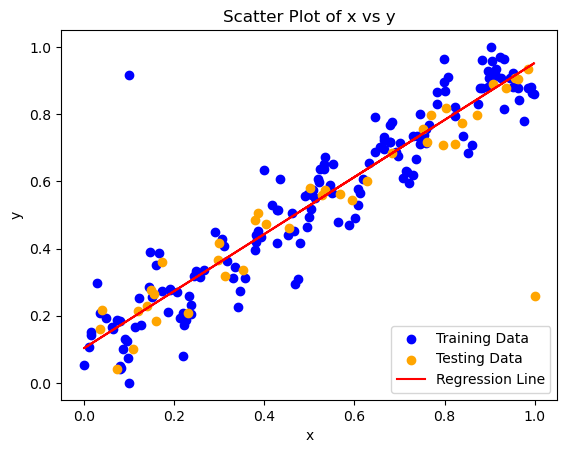

In [15]:
plt.scatter(training_data['x'], training_data['y'], color='blue', label='Training Data')
plt.scatter(testing_data['x'], testing_data['y'], color='orange', label='Testing Data')
plt.plot(training_data['x'], sm.OLS(training_data['y'], sm.add_constant(training_data[['x']])).fit().predict(sm.add_constant(training_data[['x']])), color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y')
plt.legend()
plt.savefig('UE_04_App2_ScatterVisualizationAndOLSModel.pdf')
plt.show()

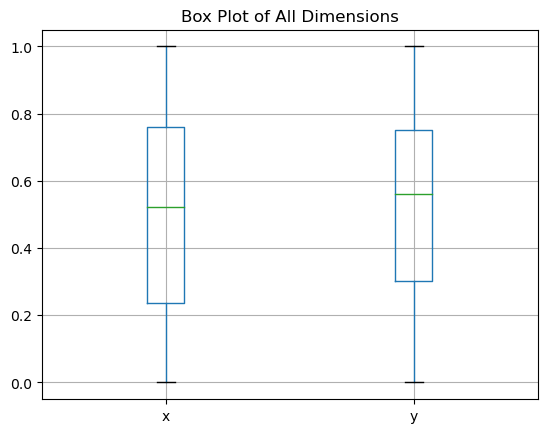

In [16]:
final_data.boxplot()
plt.title('Box Plot of All Dimensions')
plt.savefig('UE_04_App2_BoxPlot.pdf')
plt.show()

In [17]:
from UE_04_LinearRegDiagnostic import LinearRegDiagnostic
import statsmodels.formula.api as smf


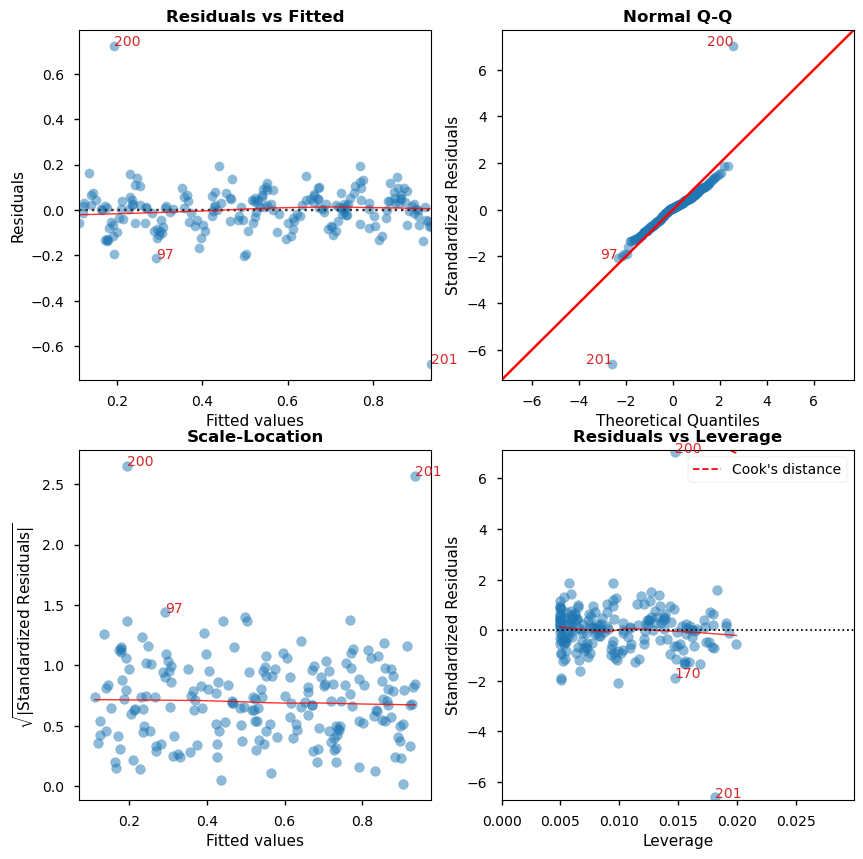

    Features  VIF Factor
1          x        1.00
0  Intercept        4.03


In [18]:
model = smf.ols('y ~ x', data=final_data).fit()

# Initialize the LinearRegDiagnostic class
diagnostic = LinearRegDiagnostic(model)

vif_table, fig, ax = diagnostic(plot_context='seaborn-notebook')
fig.set_size_inches(12, 8)

# Adjust layout to reduce overlap
fig.tight_layout()
fig.savefig('UE_04_App2_DiagnosticPlots.pdf')

print(vif_table)

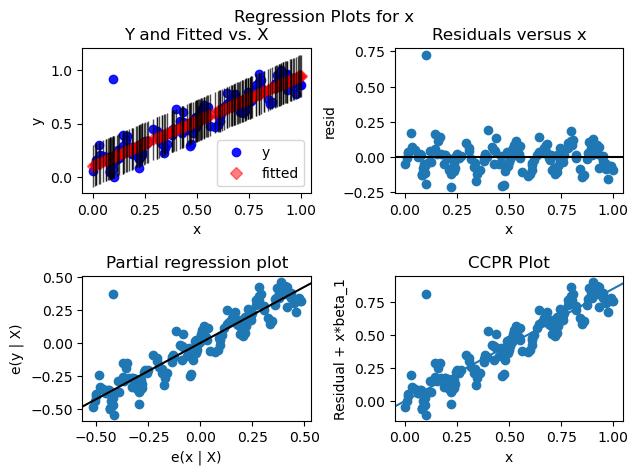

In [119]:
import statsmodels.graphics.api as smg

model = sm.OLS(training_data['y'], sm.add_constant(training_data[['x']])).fit()
fig = smg.plot_regress_exog(model, 'x')
fig.savefig('UE_04_App2_DiagnosticPlots.pdf')
plt.show()